# Algoritma Genetika Untuk Klastering

## TUGAS KAPSEL

## Ide Penyelesaian
Secara garis besar, ide untuk menyelesaikan proses klastering adalah
1. Menentukan jarak setiap titik yang ada
2. Mencari titik klaster sebanyak jumlah klaster yang di inginkan, titik klaster adalah titik yang memiliki total jarak jarak yang paling kecil jika di ukur ke titik-titik lainnya
3. Proses penentuan titik-titik klaster menggunakan Algoritma Genetika
4. Memprediksi klaster setiap titik yang ada dengan cara mengukur jarak titik tersebut ke titik-titik klaster, penggolongan klaster ditentukan dengan meninjau jarak yang paling dekat dengan titik klaster

## Implementasi Algoritma

##### 1. Import library

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

##### 2. Fungsi menghitung jarak tiap titik

In [2]:
def Distance(x, y):
    dist = np.array([np.sqrt((x[i] - x)**2 + (y[i] - y)**2) for i in range(len(x))], dtype=int)
    
    return dist

##### 3. Fungsi fitness

In [3]:
def Fitness(p, dist):
    popFit = p.copy()
    popFit["fitness"] = [sum(list(map(lambda x: sum(dist[x]), p.iloc[i,:-1]))) for i in range(len(p))]
    
    return popFit

##### 4. Fungsi membuat populasi awal

In [4]:
def CreatePopulation(n_chrom, cluster, n_point, dist):
    arr_pop = np.array([np.random.permutation(n_point)[:cluster] for i in range(n_chrom)])
    pop = pd.DataFrame(arr_pop)
    
    pop["fitness"] = 0
    pop = Fitness(pop, dist)
    
    return pop

##### 5. Fungsi crossover

In [5]:
def Crossover(pop, dist):
    n = len(pop)
    m = len(pop.keys()) - 1
    popc = pop.copy()
    
    for i in range(n):
        n1, n2 = np.random.permutation(n)[:2]
        idx = np.random.randint(0,m)
        
        temp1 = list(pop.iloc[n1,:-1])
        temp2 = list(pop.iloc[n2,:-1])
        
        if temp1[idx] in temp2:
            temp2.remove(temp1[idx])
            temp2.insert(idx,temp1[idx])
        else:
            temp2[idx] = temp1[idx]
        temp2.append(pop.iloc[n2,-1])
        
        popc.loc[i] = temp2
    
    popc = Fitness(popc, dist)
    
    return popc

##### 6. Fungsi mutasi

In [6]:
def Mutation(popc, dist):
    n = len(popc)
    m = len(popc.keys()) - 1
    popm = popc.copy()
    
    for i in range(n):
        temp = list(map(lambda x: x-1 if x!=0 else max(popc.iloc[i,:-1]), popc.iloc[i,:-1]))
        temp.append(popc.iloc[i,-1])
        popm.loc[i] = temp
    
    popm = Fitness(popm, dist)
    
    return popm

##### 7. Fungsi penggabungan dan seleksi

In [7]:
def CombineAndSelection(pop, popc, popm):
    n = len(pop)
    
    popAll = pop.copy()
    popAll = popAll.append(popc, ignore_index=True)
    popAll = popAll.append(popm, ignore_index=True)
    
    popAll = popAll.sort_values(by=['fitness'])
    popAll.index = range(len(popAll))
    
    popAll = popAll.drop_duplicates()
    popAll = popAll.head(n)
    
    return popAll

##### 8. Fungsi prediksi

In [8]:
def PredictCluster(chrom, n_point, dist):
    arr_index = np.arange(0, n_point)
    list_cluster = [np.array(list(map(lambda x: dist[x,idx], chrom))).argmin() for idx in arr_index]
    
    return list_cluster

##### 9. Plotting

In [9]:
def PlotSolution(x, y, cluster, Title=""):
    arr_index = np.arange(0, len(x))
    plt.figure(figsize=(10,5))
    sns.scatterplot(x, y , hue=cluster, style=cluster, s=150, palette="Set1", legend="full")
    
    plt.legend(title="Klaster")
    plt.title(Title)
    plt.show()

##### 10. Fungsi utama

In [10]:
def SolveClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=2, p_cross=1, p_mut=1, 
                                    max_generate=10, plot_step=False, step=1):
    
    dist = Distance(x, y)
    
    pop = CreatePopulation(n_chrom, cluster, len(x), dist)
    print('Titik klaster pada populasi awal')
    print(pop.head(1))
    PlotSolution(x, y, np.zeros(len(x), dtype=int), Title="Ploting Data Sebelum Klastering")
    print()

    for i in range(max_generate):
        pc = np.random.rand()
        pm = np.random.rand()

        popc = pop.copy()
        popm = pop.copy()

        if pc < p_cross:
            popc = Crossover(pop, dist)
            
        if pm < p_mut:
            popm = Mutation(popc, dist)
            
        pop = CombineAndSelection(pop, popc, popm)
        
        if plot_step and i%step==0:
            print('Titik klaster pada generasi ke',i)
            print(pop.head(1))
            list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
            PlotSolution(x, y, list_cluster, Title="Ploting Data Proses Klastering")
            
    print()
    print('Titik klaster terbaik pada populasi akhir')
    print(pop.head(1))
    list_cluster = PredictCluster(pop.iloc[0,:-1], len(x), dist)
    PlotSolution(x, y, list_cluster, Title="Ploting Data Sesudah Klastering")

### Contoh 1
Klastering 16 titik, dimana
1. Jumlah populasi 10
2. Jumlah klaster 4
3. Jumlah generasi 15
4. Pasti terjadi crossover dan mutasi 
5. Ploting proses setiap 4 generasi

#### Titik-titik pada contoh 1

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


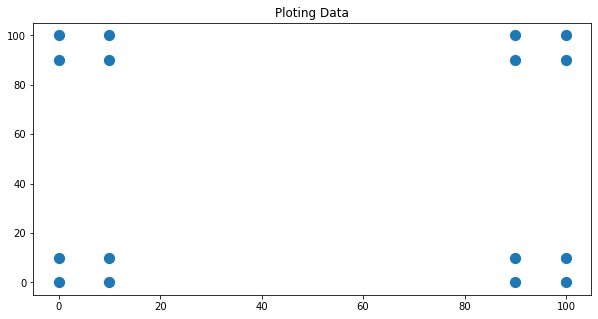

In [11]:
x = np.array([0, 10, 10, 0, 100, 100, 90, 90, 100, 100, 90, 90, 0, 0, 10, 10])
y = np.array([0, 0, 10, 10, 100, 90, 100, 90, 0, 10, 0, 10, 90, 100, 90, 100])

plt.figure(figsize=(10,5))
sns.scatterplot(x, y, s=150, palette="Set1")
plt.title("Ploting Data")
plt.show()

#### Solusi contoh 1

Titik klaster pada populasi awal
    0   1   2  3  fitness
0  14  13  11  4     5048


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


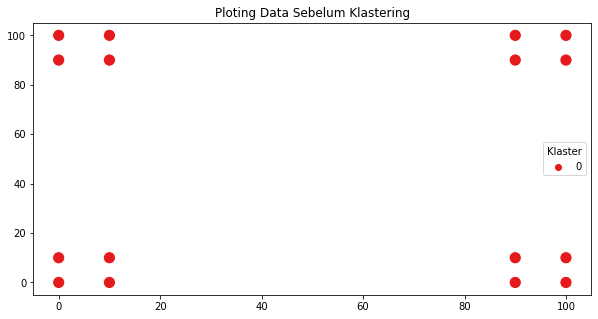


Titik klaster pada generasi ke 0
    0   1  2  3  fitness
0  12  11  7  9     4914


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


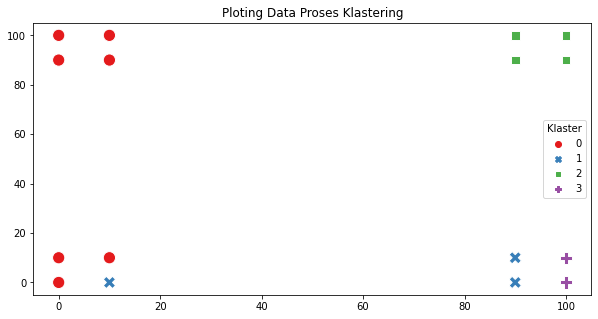

Titik klaster pada generasi ke 4
    0   1  2  3  fitness
0  14  11  2  5     4845


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


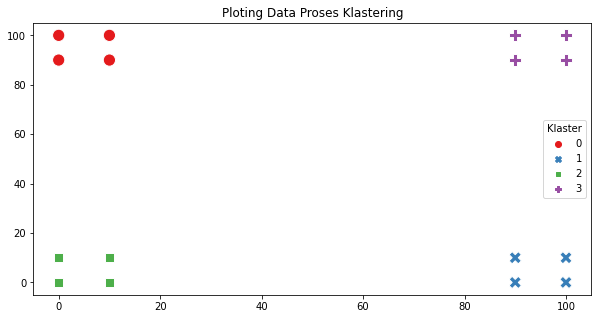

Titik klaster pada generasi ke 8
    0   1  2  3  fitness
0  14  11  2  5     4845


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


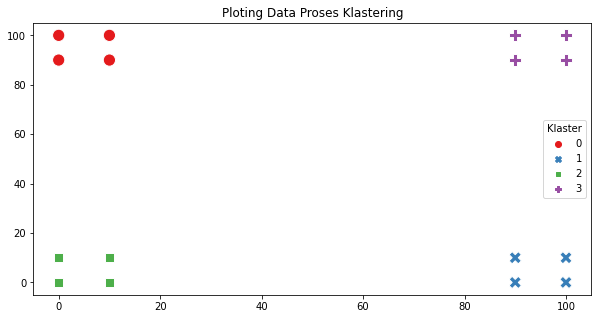

Titik klaster pada generasi ke 12
    0   1  2  3  fitness
0  14  11  2  5     4845


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


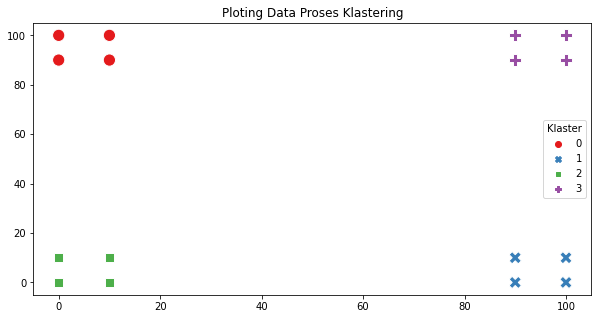


Titik klaster terbaik pada populasi akhir
    0   1  2  3  fitness
0  14  11  2  5     4845


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


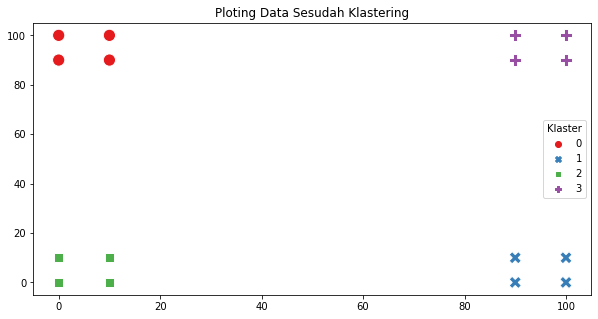

In [12]:
SolveClusteringGeneticAlgorithm(x, y, n_chrom=10, cluster=4, max_generate=15, plot_step=True, step=4)

### Contoh 2
Klastering 120 titik, dimana
1. Jumlah populasi 20
2. Jumlah klaster 3
3. Jumlah generasi 100
4. Peluang terjadinya crossover dan mutasi adalah 0.95 dan 0.9 
5. Ploting awal dan akhir populasi

#### Titik-titik pada contoh 2

In [13]:
x = np.random.random(120)*100
y = np.random.random(120)*100

#### Solusi contoh 2

Titik klaster pada populasi awal
    0   1  2  fitness
0  40  15  5    18018


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


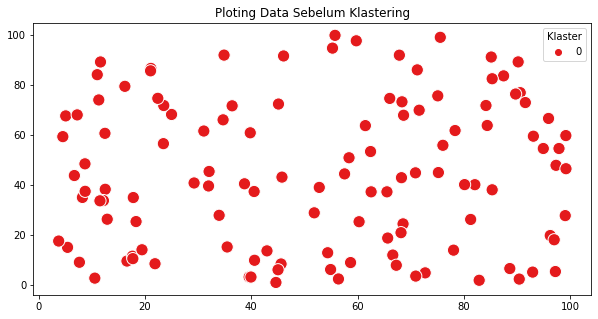

In [ ]:
SolveClusteringGeneticAlgorithm(x, y, n_chrom=20, cluster=3,
                                p_cross=0.95, p_mut=0.9, max_generate=100, plot_step=False)